## EM Clustering Using GMM

K-Means clustering optimizes on the means and variation of the clusters. This may ignore larger trends that supercede simple local mean and variation. For this method, the model uses a Gaussian Model to denote the cluster points on a range. The parameters it measures are mean and deviation, but it more forgiving on complex structures such as circles. To achieve this goal, Expectation Maximization occurs to get baseline metrics to use the GMMs to optimize. 
Sources for this notebook can be found [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html)

In [11]:
#Imports
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
plt.rcParams["axes.grid"] = False

In [92]:
#Creating Data Set
#This time we are treating them as parametric functions
#4 distinct clusters
t0 =  np.random.rand(100,1)
t1 =  5 + -3 * np.random.rand(100,1)
t2 =  -2 * np.random.rand(100,1)
t3 = -6+ 3 * np.random.rand(100,1)

#offsetting
t0 = np.array([[i[0]-1, (i[0]*2)**4] for i in t0])
t1 = np.array([[i[0] **.5+.2*i[0] , -1* i[0]**2 + 5*i[0]] for i in t1])
t2 = np.array([[i[0] - 5, i[0]+5] for i in t2])
t3 = np.array([[i[0], -4*i[0]] for i in t3])

In [93]:
data_whole = np.zeros((400,2))
data_whole[0:100, :] = t0
data_whole[100:200, :] = t1
data_whole[200:300, :] = t2
data_whole[300:400, :] = t3

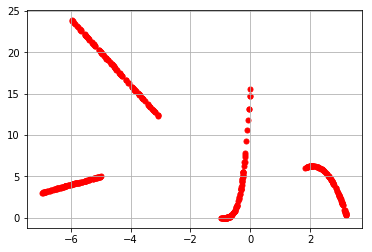

In [94]:
plt.scatter(data_whole[ : , 0], data_whole[ :, 1], s = 25, color='r')
plt.grid()
#Note
#Far Left Cluster is t2
#Short postive parabolic cluster is t0
#The Long Downward sloping line is t3
#The negative parabolic cluster is t1


In [95]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, covariance_type='spherical')
gmm.fit(data_whole)


GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=4, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

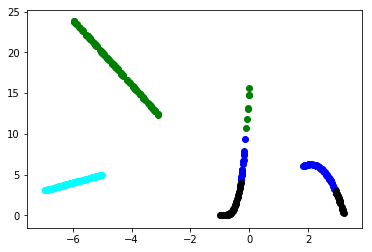

In [96]:
import pandas as pd
#predictions from gmm
labels = gmm.predict(data_whole)
frame = pd.DataFrame(data_whole)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()

In [75]:
#Define the desired cluster to be searched
k = 4

# create and initialize the cluster centers and the weight paramters
weights = np.ones((k)) / k
means = np.random.choice(X.flatten(), (k,X.shape[1]))
print(means)
print(weights)

[[ 7.00801104  1.31515486]
 [ 8.50578243  1.71691934]
 [ 2.48583278  7.83666244]
 [11.83973774  2.97202632]]
[0.25 0.25 0.25 0.25]
